<a href="https://colab.research.google.com/github/sgnk/colab/blob/master/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
batch_size = 128
num_class = 10
epochs  = 20

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
keras.backend.image_data_format()

'channels_last'

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

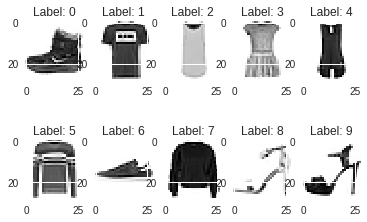

In [8]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title("Label: " + str(i))
  plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = keras.models.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(num_class, activation='softmax'),
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.4858 - acc: 0.8260
Epoch 2/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3280 - acc: 0.8824
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2811 - acc: 0.8958
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2483 - acc: 0.9091
Epoch 5/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2286 - acc: 0.9155
Epoch 6/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2106 - acc: 0.9229
Epoch 7/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1926 - acc: 0.9288
Epoch 8/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.1808 - acc: 0.9333
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.1666 - acc: 0.9382
Epoch 10/10
60000/60000 [==============================] - 18s 305us/step - loss: 

In [13]:
model.evaluate(x_test, y_test, verbose=0)

[0.223037775580585, 0.9227]

In [14]:
model.predict(x_test[0:1])

array([[1.6333225e-14, 1.2493963e-14, 8.8497172e-15, 3.3857057e-15,
        1.2324303e-15, 2.3070341e-10, 2.3335908e-15, 7.6507305e-08,
        2.4335214e-15, 9.9999988e-01]], dtype=float32)